# Infer building instances with a Mask-RCNN model

In [25]:
import json
import os
import numpy as np
from PIL import Image

from mrcnn import model as modellib
from mrcnn.config import Config
from mrcnn import visualize

In [2]:
from tanzania_challenge import buildings

## Dataset configuration setting

In [3]:
class BuildingConfig(Config):
    NAME = "building"
    NUM_CLASSES = 1 + 3
    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [4]:
config = BuildingConfig()

## Model loading

In [5]:
model_dir = os.path.join("..", "data", "open_ai_tanzania", "output", "instance_segmentation", "checkpoints")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=model_dir)

In [6]:
weights_path = model.find_last()
model.load_weights(weights_path, by_name=True)

Re-starting from epoch 60


## Dataset declaration

In [7]:
test_bd = buildings.BuildingDataset()
test_bd.load_buildings(os.path.join("..", "data", "open_ai_tanzania", "preprocessed"),
                       subset="testing", img_size=config.IMAGE_MIN_DIM)
test_bd.prepare()

In [8]:
nb_images = len(test_bd.image_info)

In [9]:
test_bd.num_images

60344

In [10]:
import time

for image_id in test_bd.image_ids[:1]:
    a = time.time()
    image = test_bd.load_image(image_id)
    print(np.expand_dims(image, 0).shape)
    prediction = model.detect(np.expand_dims(image, 0))
    print(prediction[0]["class_ids"])
    b = time.time()
    print(b-a)

(1, 221, 267, 3)
[]
5.707720518112183


## Image inference

In [11]:
image_path = os.path.join("..", "data", "open_ai_tanzania", "preprocessed", "384", "testing", "images",
                         "5ae36dd70b093000130afdbb_384_384_19200_43392.tif")

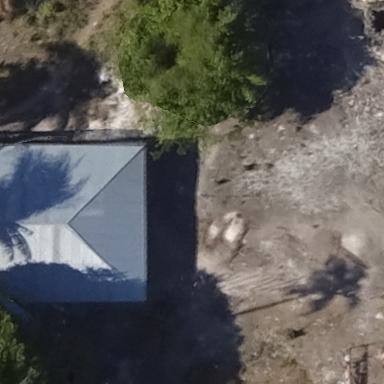

In [15]:
im = Image.open(image_path) ; im

In [18]:
prediction = model.detect(np.expand_dims(np.array(im), 0))

In [19]:
p = prediction[0]
p["rois"], p["class_ids"], p["scores"]

(array([[153,   0, 308, 147]], dtype=int32),
 array([1], dtype=int32),
 array([0.8567583], dtype=float32))

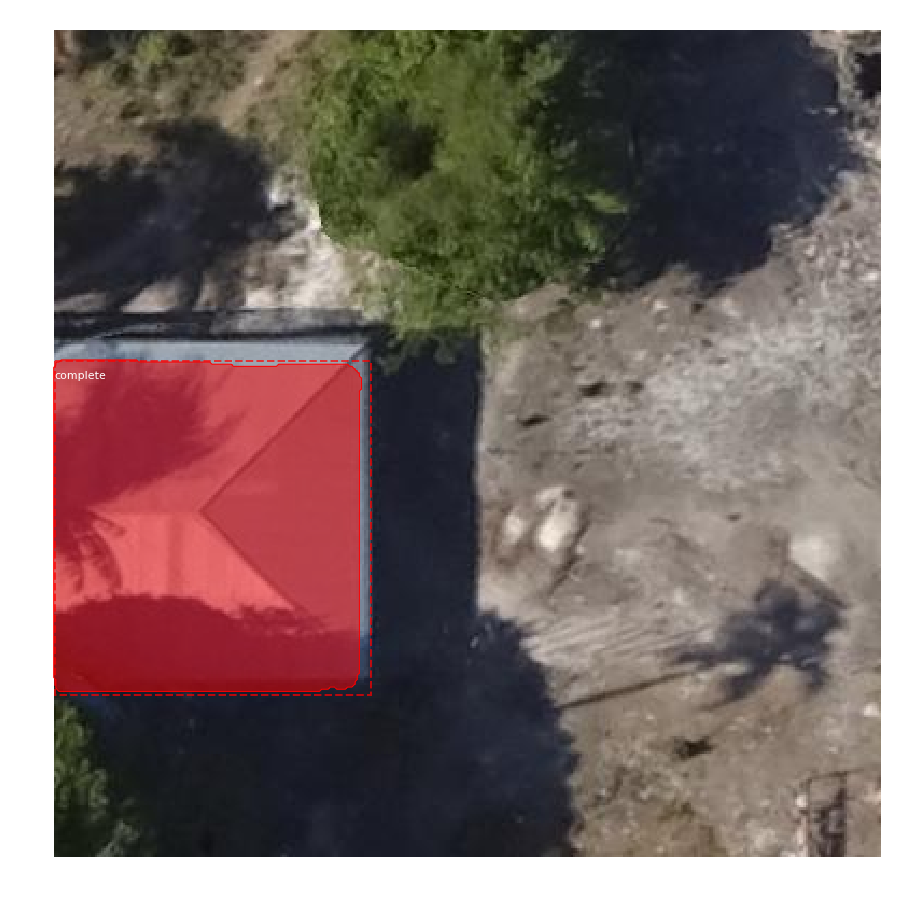

In [22]:
visualize.display_instances(np.array(im),
                            p["rois"],
                            p["masks"],
                            p["class_ids"],
                            ["", "complete", "incomplete", "foundation"],
                           show_mask=True)

In [23]:
test_bd.image_info[image_id]

{'id': 0,
 'source': 'building',
 'path': '../data/open_ai_tanzania/preprocessed/384/testing/images/5ae242fd0b093000130afd33_267_221_42624_42624.tif',
 'name': '5ae242fd0b093000130afd33_267_221_42624_42624.tif',
 'raw_image_path': '../data/input/images/5ae242fd0b093000130afd33_267.tif',
 'feature_path': '../data/open_ai_tanzania/preprocessed/384/testing/features/5ae242fd0b093000130afd33_267_221_42624_42624.json',
 'item_path': '../data/open_ai_tanzania/preprocessed/384/testing/items/5ae242fd0b093000130afd33_267_221_42624_42624.json',
 'prediction_path': '../data/open_ai_tanzania/preprocessed/384/testing/predicted_labels/5ae242fd0b093000130afd33_267_221_42624_42624.json',
 'width': 384,
 'height': 384}

In [26]:
with open("../data/open_ai_tanzania/preprocessed/384/testing/prediction_log.json") as fobj:
    prediction_log = json.load(fobj)

In [37]:
for filename in os.listdir("../data/open_ai_tanzania/input/testing/images"):
    print(sum([pl for key, pl in prediction_log.items() if filename in key]))

0
0
0
0
0
0
0


In [34]:
os.listdir("../data/open_ai_tanzania/input/testing/images")

['5ae242fd0b093000130afd33.tif',
 '5ae318220b093000130afd99.tif',
 '5ae36dd70b093000130afdbb.tif',
 '5ae38a540b093000130afed0.tif',
 '5ae38a540b093000130aff24.tif',
 '5b00370f2b6a08001185f129.tif',
 '5b00370f2b6a08001185f12b.tif']